# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bagging & Boosting Methods Capstone Project (Titanic Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

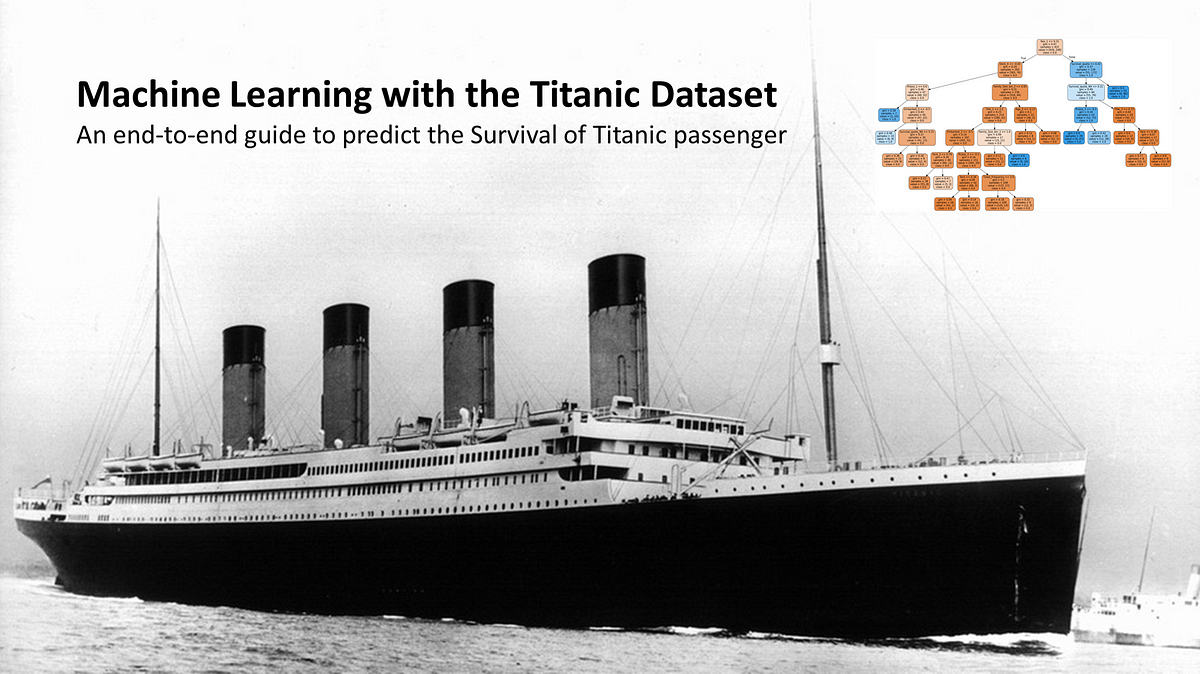

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

PassengerId: Yolcunun kimlik numarası.

Survived: Yolcunun hayatta kalıp kalmadığı bilgisi (0 = Hayır, 1 = Evet).

Pclass: Yolcunun bilet sınıfı (1 = Birinci sınıf, 2 = İkinci sınıf, 3 = Üçüncü sınıf).

Name: Yolcunun adı ve soyadı.

Sex: Yolcunun cinsiyeti (male = Erkek, female = Kadın).

Age: Yolcunun yaşı.

SibSp: Yolcunun gemideki kardeş/eş sayısı.

Parch: Yolcunun gemideki ebeveyn/çocuk sayısı.

Ticket: Yolcunun bilet numarası.

Fare: Yolcunun ödediği bilet ücreti.

Cabin: Yolcunun kabin numarası.

Embarked: Yolcunun gemiye bindiği liman (C = Cherbourg, Q = Queenstown, S = Southampton).

## Import Library

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics 

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [100]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
submission01 = pd.read_csv("gender_submission.csv")
submission01.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Preparation

## Exploratory Data Analysis (EDA)

In [103]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [106]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [107]:
def fill_null_values_by_probability_df(df, column_list):
    for column_name in column_list:
        # Calculate value counts and probabilities for non-null values
        tmp = df[column_name].value_counts()
        v = tmp.index 
        p = tmp.values 
        p = p / sum(p)

        print("Before filling null values:")
        print(train_data.isnull().sum().sum())

        # Fill null values based on the distribution of non-null values
        df.loc[df[column_name].isna(), column_name] = np.random.choice(v, df[column_name].isna().sum(), p=p)
    

    print("\nAfter filling null values:")
    print(train_data.isnull().sum().sum())

In [108]:
null_columns = ["Age", "Cabin","Embarked"]

In [109]:
fill_null_values_by_probability_df(train_data, null_columns)

Before filling null values:
866
Before filling null values:
689
Before filling null values:
2

After filling null values:
0


In [110]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [111]:
train_data.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

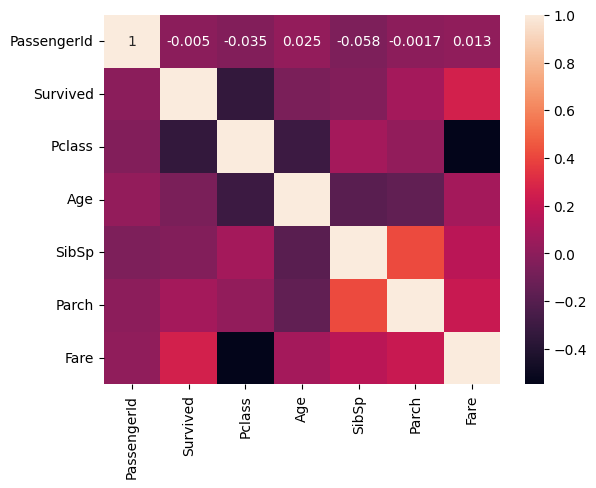

In [112]:
sns.heatmap(train_data.corr(numeric_only=True), annot = True);

In [113]:
train_data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.025266,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067296,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.305154,0.083081,0.018443,-0.549500
Age,0.025266,-0.067296,-0.305154,1.000000,-0.189018,-0.160538,0.083308
SibSp,-0.057527,-0.035322,0.083081,-0.189018,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.160538,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.083308,0.159651,0.216225,1.000000


In [114]:
train_data_numeric = train_data.select_dtypes(include="number")

In [115]:
train_data_object = train_data.select_dtypes(include="object")

### Multicolinearty

In [116]:
train_data_numeric.corr()[(train_data_numeric.corr()>= 0.9) & (train_data_numeric.corr() < 1)].any().any()

# +0.9 ile +1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.


False

In [117]:
train_data_numeric.corr()[(train_data_numeric.corr()<= -0.9) & (train_data_numeric.corr() > -1)].any().any()

# -0.9 ile -1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

False

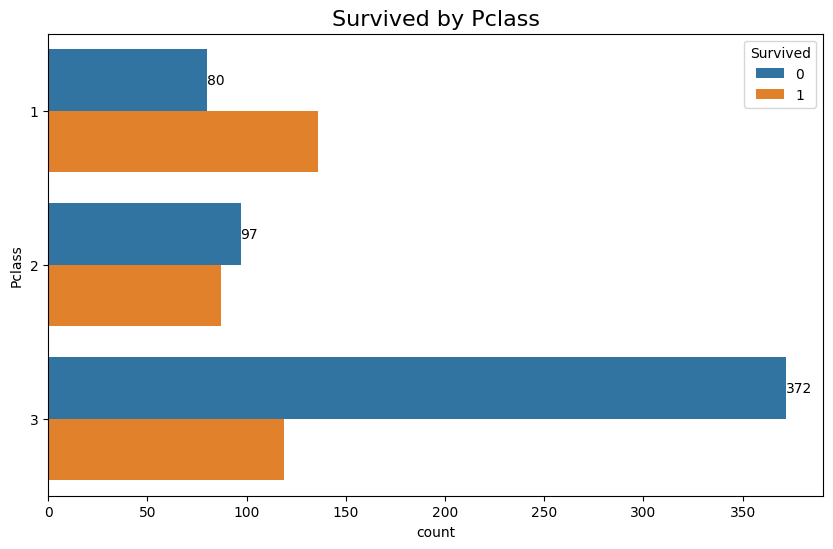

In [118]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = train_data['Pclass'], hue = train_data['Survived'])
plt.title("Survived by Pclass", fontsize = 16)
ax.bar_label(ax.containers[0]);

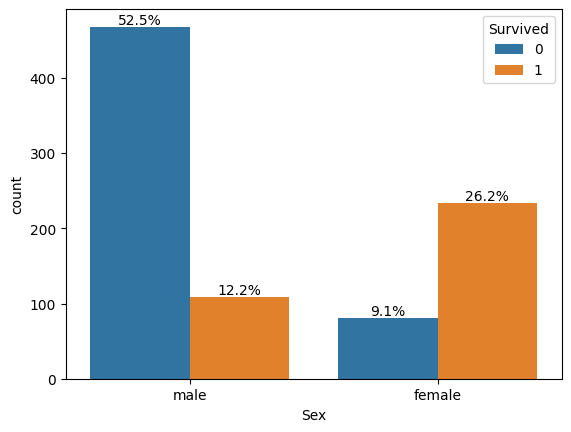

In [119]:
ax = sns.countplot(data=train_data, x="Sex", hue="Survived")

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100 / train_data.shape[0]:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.show()

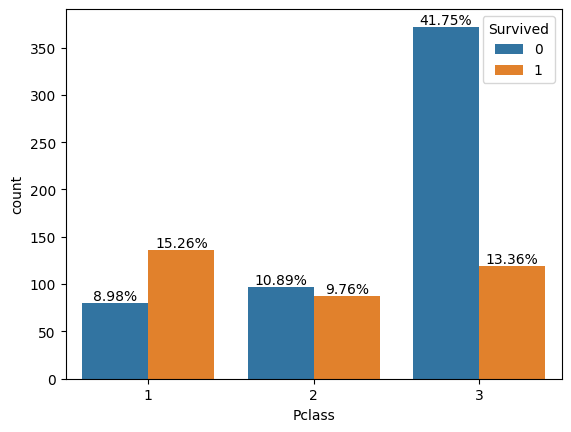

In [120]:
ax = sns.countplot(data=train_data, x="Pclass", hue="Survived")

# Calculate and annotate the percentages on top of the bars
total = len(train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

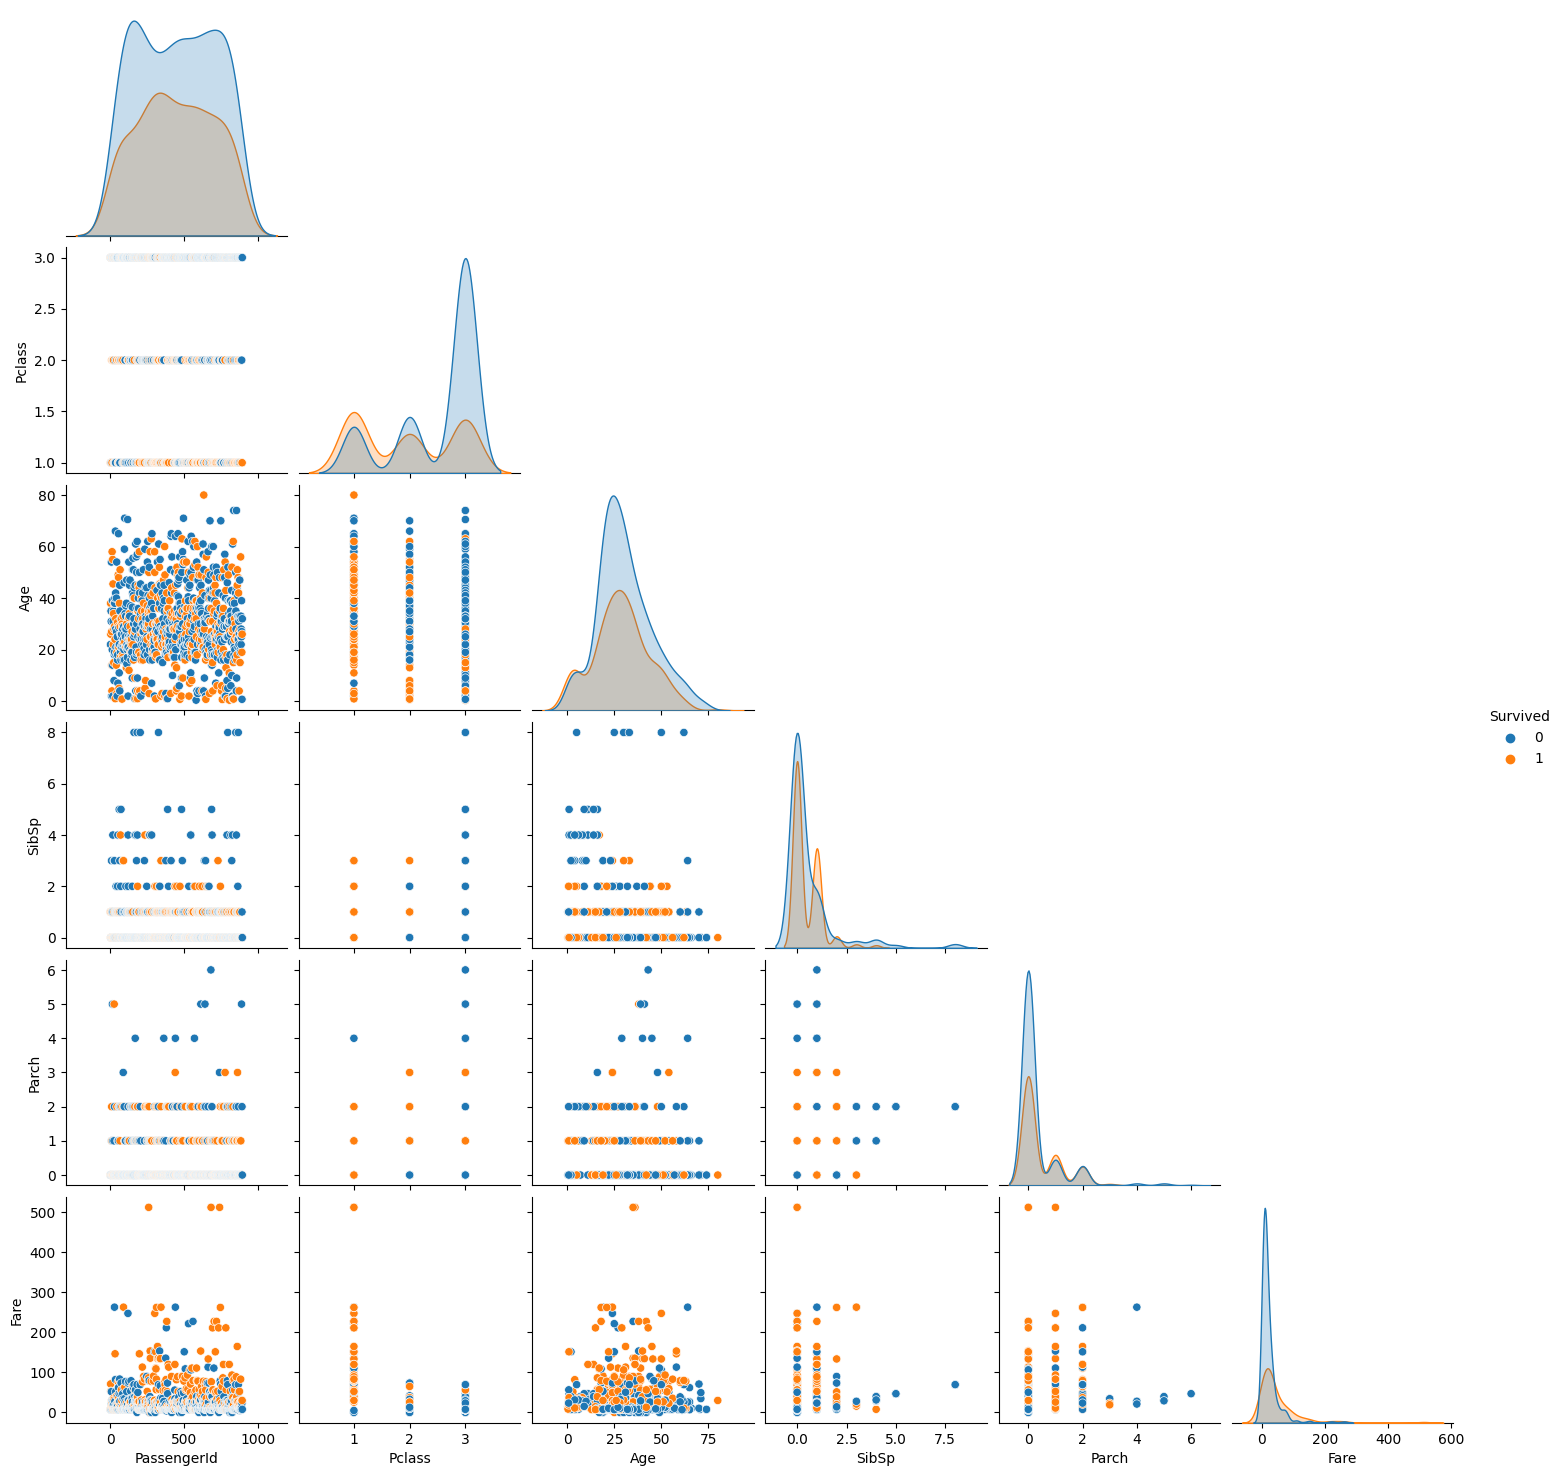

In [121]:
sns.pairplot(train_data, hue = "Survived", corner=True);

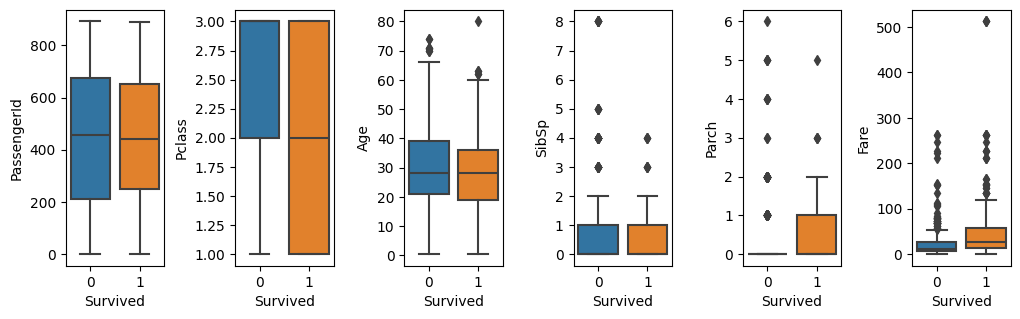

In [122]:
features = train_data_numeric.columns
index = 0
plt.figure(figsize=(12, 6))

for feature in features:
    if feature != "Survived":
        index += 1
        plt.subplot(2, 7, index)
        sns.boxplot(x='Survived', y=feature, data=train_data_numeric)
plt.tight_layout()
plt.show()

In [123]:
train_data.groupby("Pclass")["Embarked"].value_counts()

Pclass  Embarked
1       S           129
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

## Train | Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = train_data.drop(["Survived", "Name", "Ticket"], axis=1)
y = train_data["Survived"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [127]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [128]:
cat_onehot = ["Cabin"]
cat_ord = ["Sex", "Embarked"]
cat_for_sex = ["male", "female"]
cat_for_emb = ['S', 'C', 'Q']

In [129]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_sex, cat_for_emb]), cat_ord), 
                                       remainder='passthrough')

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('RF_model', RandomForestClassifier(random_state=42))])

## Modelling | Model Performance

In [131]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [132]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [133]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

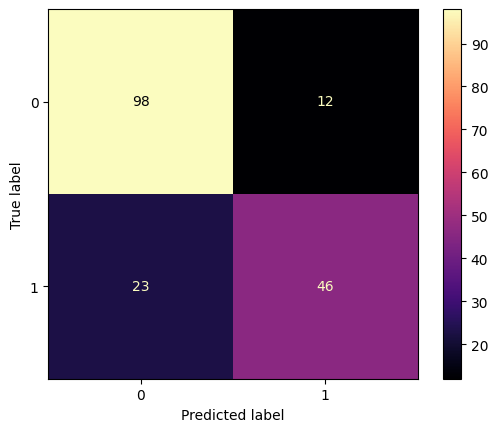

In [134]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="magma");

In [135]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[439   0]
 [  0 273]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       273

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [136]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy            0.792254
train_accuracy           1.000000
test_precision_micro     0.792254
train_precision_micro    1.000000
test_recall_micro        0.792254
train_recall_micro       1.000000
test_f1_micro            0.792254
train_f1_micro           1.000000
dtype: float64

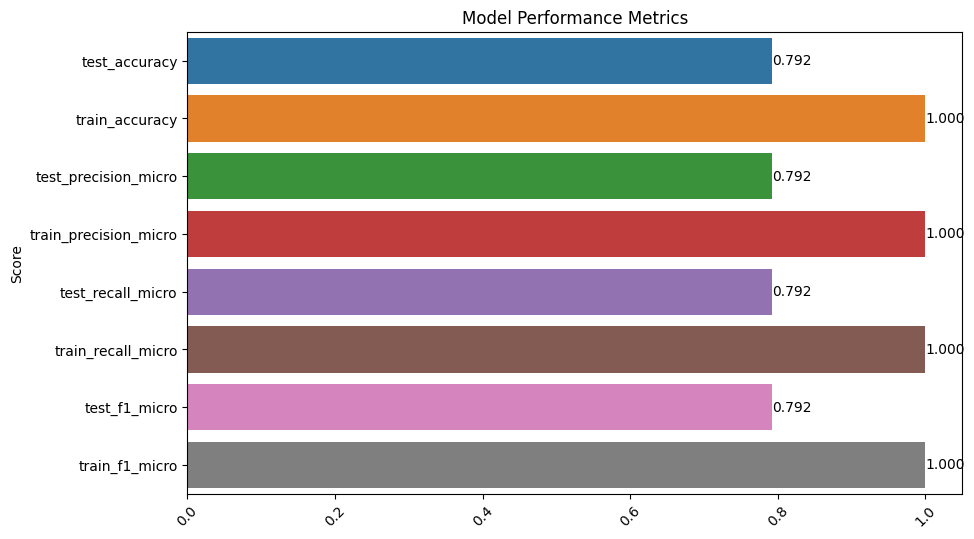

In [137]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f') 
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

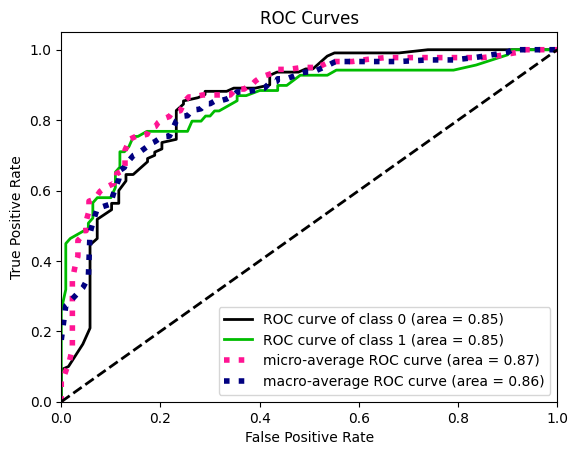

In [138]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [139]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7988826815642458


In [140]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

## AdaBoost Modelling and Model Performance

In [144]:
operations = [("OrdinalEncoder", column_trans), ("AdaBoostClassifier", AdaBoostClassifier(n_estimators=50, random_state=42))]

ada_model = Pipeline(steps=operations)

In [145]:
ada_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('AdaBoostClassifier', AdaBoostClassifier(random_state=42))])

In [146]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[87 23]
 [25 44]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       110
           1       0.66      0.64      0.65        69

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.72       179
weighted avg       0.73      0.73      0.73       179


Train_Set
[[388  51]
 [ 54 219]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       439
           1       0.81      0.80      0.81       273

    accuracy                           0.85       712
   macro avg       0.84      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712



In [147]:
scores = cross_validate(ada_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.769640
train_accuracy     0.858615
test_precision     0.713632
train_precision    0.825124
test_recall        0.674206
train_recall       0.801379
test_f1            0.688959
train_f1           0.812972
dtype: float64

## GridSearch CV

In [170]:
column_trans = ColumnTransformer(
    transformers=[
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), ['Cabin']),
        ('ordinalencoder', OrdinalEncoder(categories=[['male', 'female'], ['S', 'C', 'Q']]), ['Sex', 'Embarked'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('OrdinalEncoder', column_trans),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42))
])

model.set_params(AdaBoostClassifier__learning_rate=1.0)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('AdaBoostClassifier', AdaBoostClassifier(random_state=42))])

In [171]:
param_grid = {
    "AdaBoostClassifier__learning_rate": [0.01, 0.1, 1.0, 10.0]
}

In [172]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

In [173]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Cabin']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['male',
                                                                                                     'female'],
                                                                                                    ['S',
                                                                                                     'C',
                                                                                                     'Q']]),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('AdaBoostClassifier',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'AdaBoostClassifier__learning_rate': [0.01, 0.1, 1.0,
                                                               10.0]},
             scoring='accuracy')

In [174]:
ada_grid_model.best_params_


{'AdaBoostClassifier__learning_rate': 0.1}

In [175]:
ada_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('AdaBoostClassifier',
                 AdaBoostClassifier(learning_rate=0.1, random_state=42))])

In [176]:
ada_grid_model.best_score_

0.7907908992416034

In [181]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[96 14]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[370  69]
 [ 77 196]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       439
           1       0.74      0.72      0.73       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



## Gradient Boosting Modelling and Model Performance

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

In [206]:
operations = [("OrdinalEncoder", column_trans), ("GradientBoostClassifier", GradientBoostingClassifier(n_estimators=100, random_state=42))]

gradient_model = Pipeline(steps=operations)
gradient_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('GradientBoostClassifier',
                 GradientBoostingClassifier(random_state=42))])

In [207]:
eval_metric(gradient_model, X_train, y_train, X_test, y_test)

Test_Set
[[97 13]
 [26 43]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       110
           1       0.77      0.62      0.69        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[417  22]
 [ 44 229]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       439
           1       0.91      0.84      0.87       273

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



In [208]:
scores = cross_validate(
    gradient_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.796420
train_accuracy     0.908707
test_precision     0.769794
train_precision    0.930395
test_recall        0.666667
train_recall       0.823771
test_f1            0.706592
train_f1           0.873748
test_roc_auc       0.860559
train_roc_auc      0.968149
dtype: float64

### GridSearch Gradient

In [229]:
column_trans = ColumnTransformer(
    transformers=[
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), ['Cabin']),
        ('ordinalencoder', OrdinalEncoder(categories=[['male', 'female'], ['S', 'C', 'Q']]), ['Sex', 'Embarked'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('OrdinalEncoder', column_trans),
    ('GradientBoostClassifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

model.set_params(GradientBoostClassifier__learning_rate=0.1)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('GradientBoostClassifier',
                 GradientBoostingClassifier(random_state=42))])

In [232]:
param_grid = {
    "GradientBoostClassifier__learning_rate": [0.01, 0.1, 0.5]
}

In [233]:
grid_gradient_model = GridSearchCV(gradient_model, param_grid, scoring="accuracy", verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ........GradientBoostClassifier__learning_rate=0.01; total time=   0.1s
[CV] END ........GradientBoostClassifier__learning_rate=0.01; total time=   0.1s
[CV] END ........GradientBoostClassifier__learning_rate=0.01; total time=   0.1s
[CV] END ........GradientBoostClassifier__learning_rate=0.01; total time=   0.1s
[CV] END ........GradientBoostClassifier__learning_rate=0.01; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.1; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.1; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.1; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.1; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.1; total time=   0.1s
[CV] END .........GradientBoostClassifier__learning_rate=0.5; total time=   0.1s
[CV] END .........GradientBoostClassifier__learni

In [234]:
grid_gradient_model.best_params_

{'GradientBoostClassifier__learning_rate': 0.01}

In [235]:
grid_gradient_model.best_score_

0.8175022160937655

In [237]:
y_pred = grid_gradient_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid_gradient_model, X_train, y_train, X_test, y_test)

Test_Set
[[103   7]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179


Train_Set
[[421  18]
 [ 99 174]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       439
           1       0.91      0.64      0.75       273

    accuracy                           0.84       712
   macro avg       0.86      0.80      0.81       712
weighted avg       0.85      0.84      0.83       712



## XGBoost Modelling and Model Performance

In [239]:
from xgboost import XGBClassifier

In [240]:
operations = [("OrdinalEncoder", column_trans), ("XGBClassifier", XGBClassifier(n_estimators=100, random_state=42))]

xgb_model = Pipeline(steps=operations)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [242]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[91 19]
 [26 43]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       110
           1       0.69      0.62      0.66        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179


Train_Set
[[439   0]
 [  0 273]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       273

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [243]:
column_trans = ColumnTransformer(
    transformers=[
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), ['Cabin']),
        ('ordinalencoder', OrdinalEncoder(categories=[['male', 'female'], ['S', 'C', 'Q']]), ['Sex', 'Embarked'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('OrdinalEncoder', column_trans),
    ('XGBClassifier', XGBClassifier(n_estimators=100, random_state=42))
])

model.set_params(XGBClassifier__learning_rate=0.1)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cabin']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'C',
                                                                              'Q']]),
                                                  ['Sex', 'Embarked'])])),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [244]:
param_grid= {
    "XGBClassifier__learning_rate": [0.01, 0.05, 0.1]
}

In [245]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring="accuracy",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [246]:
xgb_grid.best_params_

{'XGBClassifier__learning_rate': 0.01}

In [247]:
xgb_grid.best_score_

0.8020585048754064

In [248]:
y_pred = xgb_grid.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[105   5]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.88      0.52      0.65        69

    accuracy                           0.79       179
   macro avg       0.82      0.74      0.75       179
weighted avg       0.81      0.79      0.77       179


Train_Set
[[429  10]
 [ 84 189]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       439
           1       0.95      0.69      0.80       273

    accuracy                           0.87       712
   macro avg       0.89      0.83      0.85       712
weighted avg       0.88      0.87      0.86       712



## Comparing Models

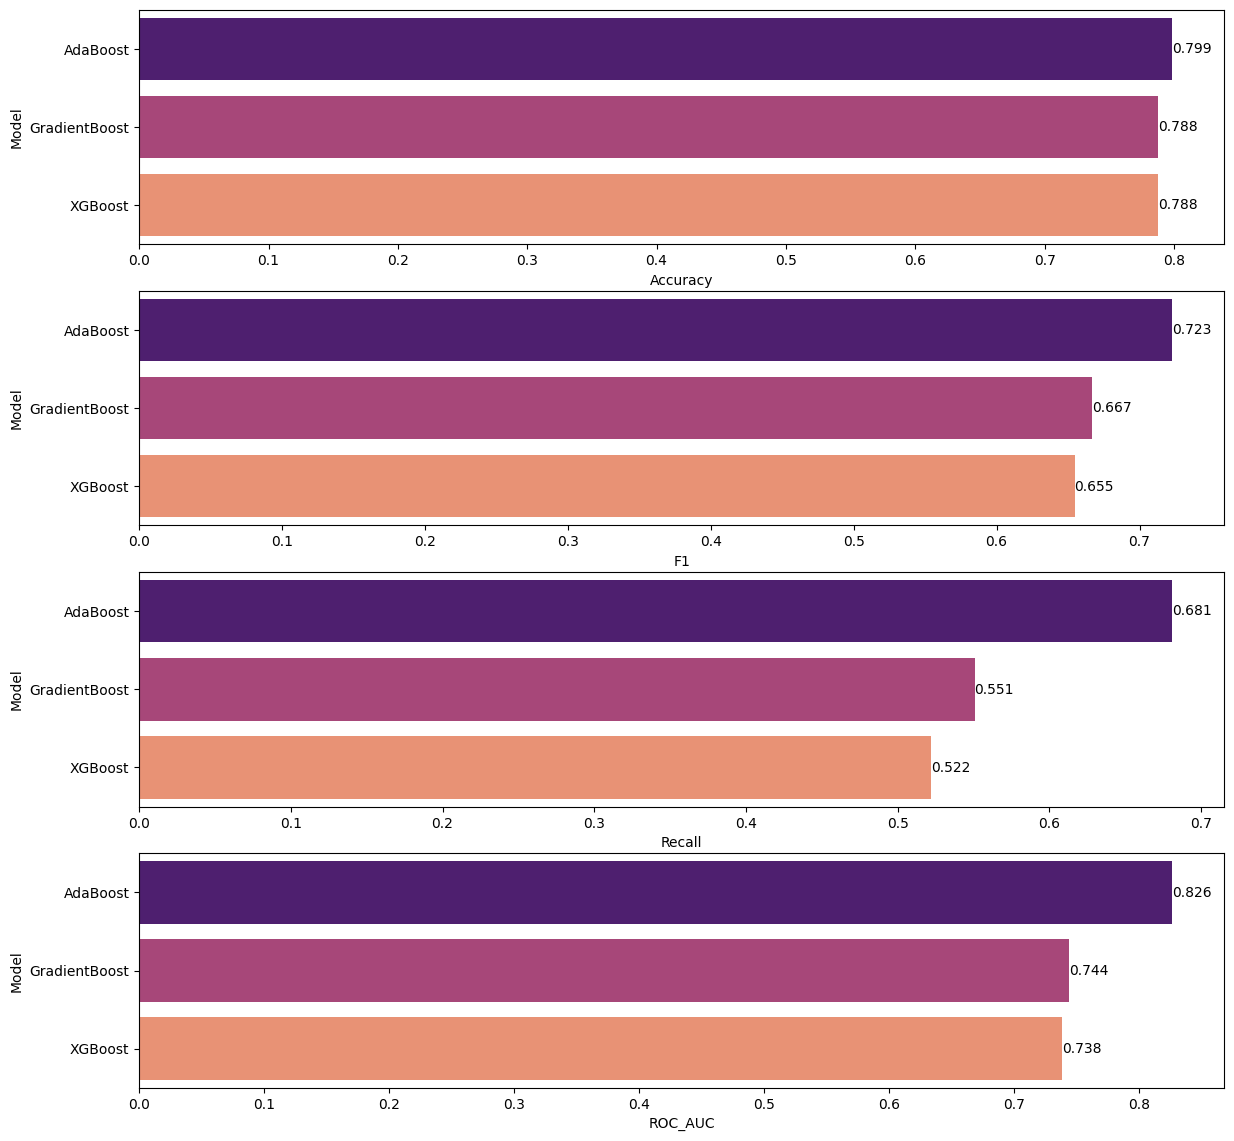

In [266]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost"],
                        "Accuracy": [ada_accuracy, gb_accuracy, xgb_accuracy],
                        "F1": [ada_f1, gb_f1, xgb_f1],
                        "Recall": [ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THE END</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |